In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [6]:
PATH_NO_VSYNC_60 = "../../data/vsync_off_60Hz"
PATH_NO_VSYNC_500 = "../../data/finals_all_0106"

In [7]:
files_no_vsync_60 = os.listdir(PATH_NO_VSYNC_60)
files_no_vsync_60 = [x for x in files_no_vsync_60 if 'csv' in x]

files_no_vsync_500 = os.listdir(PATH_NO_VSYNC_500)
files_no_vsync_500 = [x for x in files_no_vsync_500 if 'csv' in x]

In [8]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files_no_vsync_60:
    data_in = pd.read_csv(f"{PATH_NO_VSYNC_60}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -10")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data_60hz = pd.concat(file_data)

In [9]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files_no_vsync_500:
    data_in = pd.read_csv(f"{PATH_NO_VSYNC_500}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -10")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data_500hz = pd.concat(file_data)

In [10]:
data_60hz['refresh_rate'] = 60
data_60hz

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60881,64234,12680,48201,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67081,70260,16949,50132,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64345,67699,14284,50061,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63791,67134,13820,49971,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63467,66829,13552,49915,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2358,tkinter,default,tkinter_default,fullscreen,2.0,windup,56791,60313,24306,32485,60
196,196,196,2358,tkinter,default,tkinter_default,fullscreen,2.0,windup,59841,63365,27436,32405,60
197,197,197,2358,tkinter,default,tkinter_default,fullscreen,2.0,windup,65382,68902,33086,32296,60
198,198,198,2358,tkinter,default,tkinter_default,fullscreen,2.0,windup,62286,65817,30065,32221,60


In [11]:
data_500hz = data_500hz[data_500hz['program'] != 'bitblt']
data_500hz = data_500hz[data_500hz['program'] != 'getdbits']
data_500hz = data_500hz[data_500hz['complexity'] == 'default']
data_500hz = data_500hz[data_500hz['fullscreen'] == 'fullscreen']
data_500hz['refresh_rate'] = 500
data_500hz

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11810,14128,5701,6109,500
1,1,1,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,12160,14305,6129,6031,500
2,2,2,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,13260,4799,5973,500
3,3,3,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,11461,13775,5455,6006,500
4,4,4,2310,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,10772,12916,7094,3678,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8009,10332,4494,3515,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8011,10335,4916,3095,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7496,9646,4322,3174,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7330,9647,4029,3301,500


In [12]:
data = pd.concat([data_60hz, data_500hz])
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff,refresh_rate
0,0,0,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,60.881,64.234,12.680,48.201,60
1,1,1,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,67.081,70.260,16.949,50.132,60
2,2,2,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,64.345,67.699,14.284,50.061,60
3,3,3,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63.791,67.134,13.820,49.971,60
4,4,4,2351,Blend2D,default,Blend2D_default,fullscreen,2.0,getpixel,63.467,66.829,13.552,49.915,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.009,10.332,4.494,3.515,500
196,196,196,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,8.011,10.335,4.916,3.095,500
197,197,197,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.496,9.646,4.322,3.174,500
198,198,198,2299,wxpython,default,wxpython_default,fullscreen,2.0,windup,7.330,9.647,4.029,3.301,500


In [13]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppDat

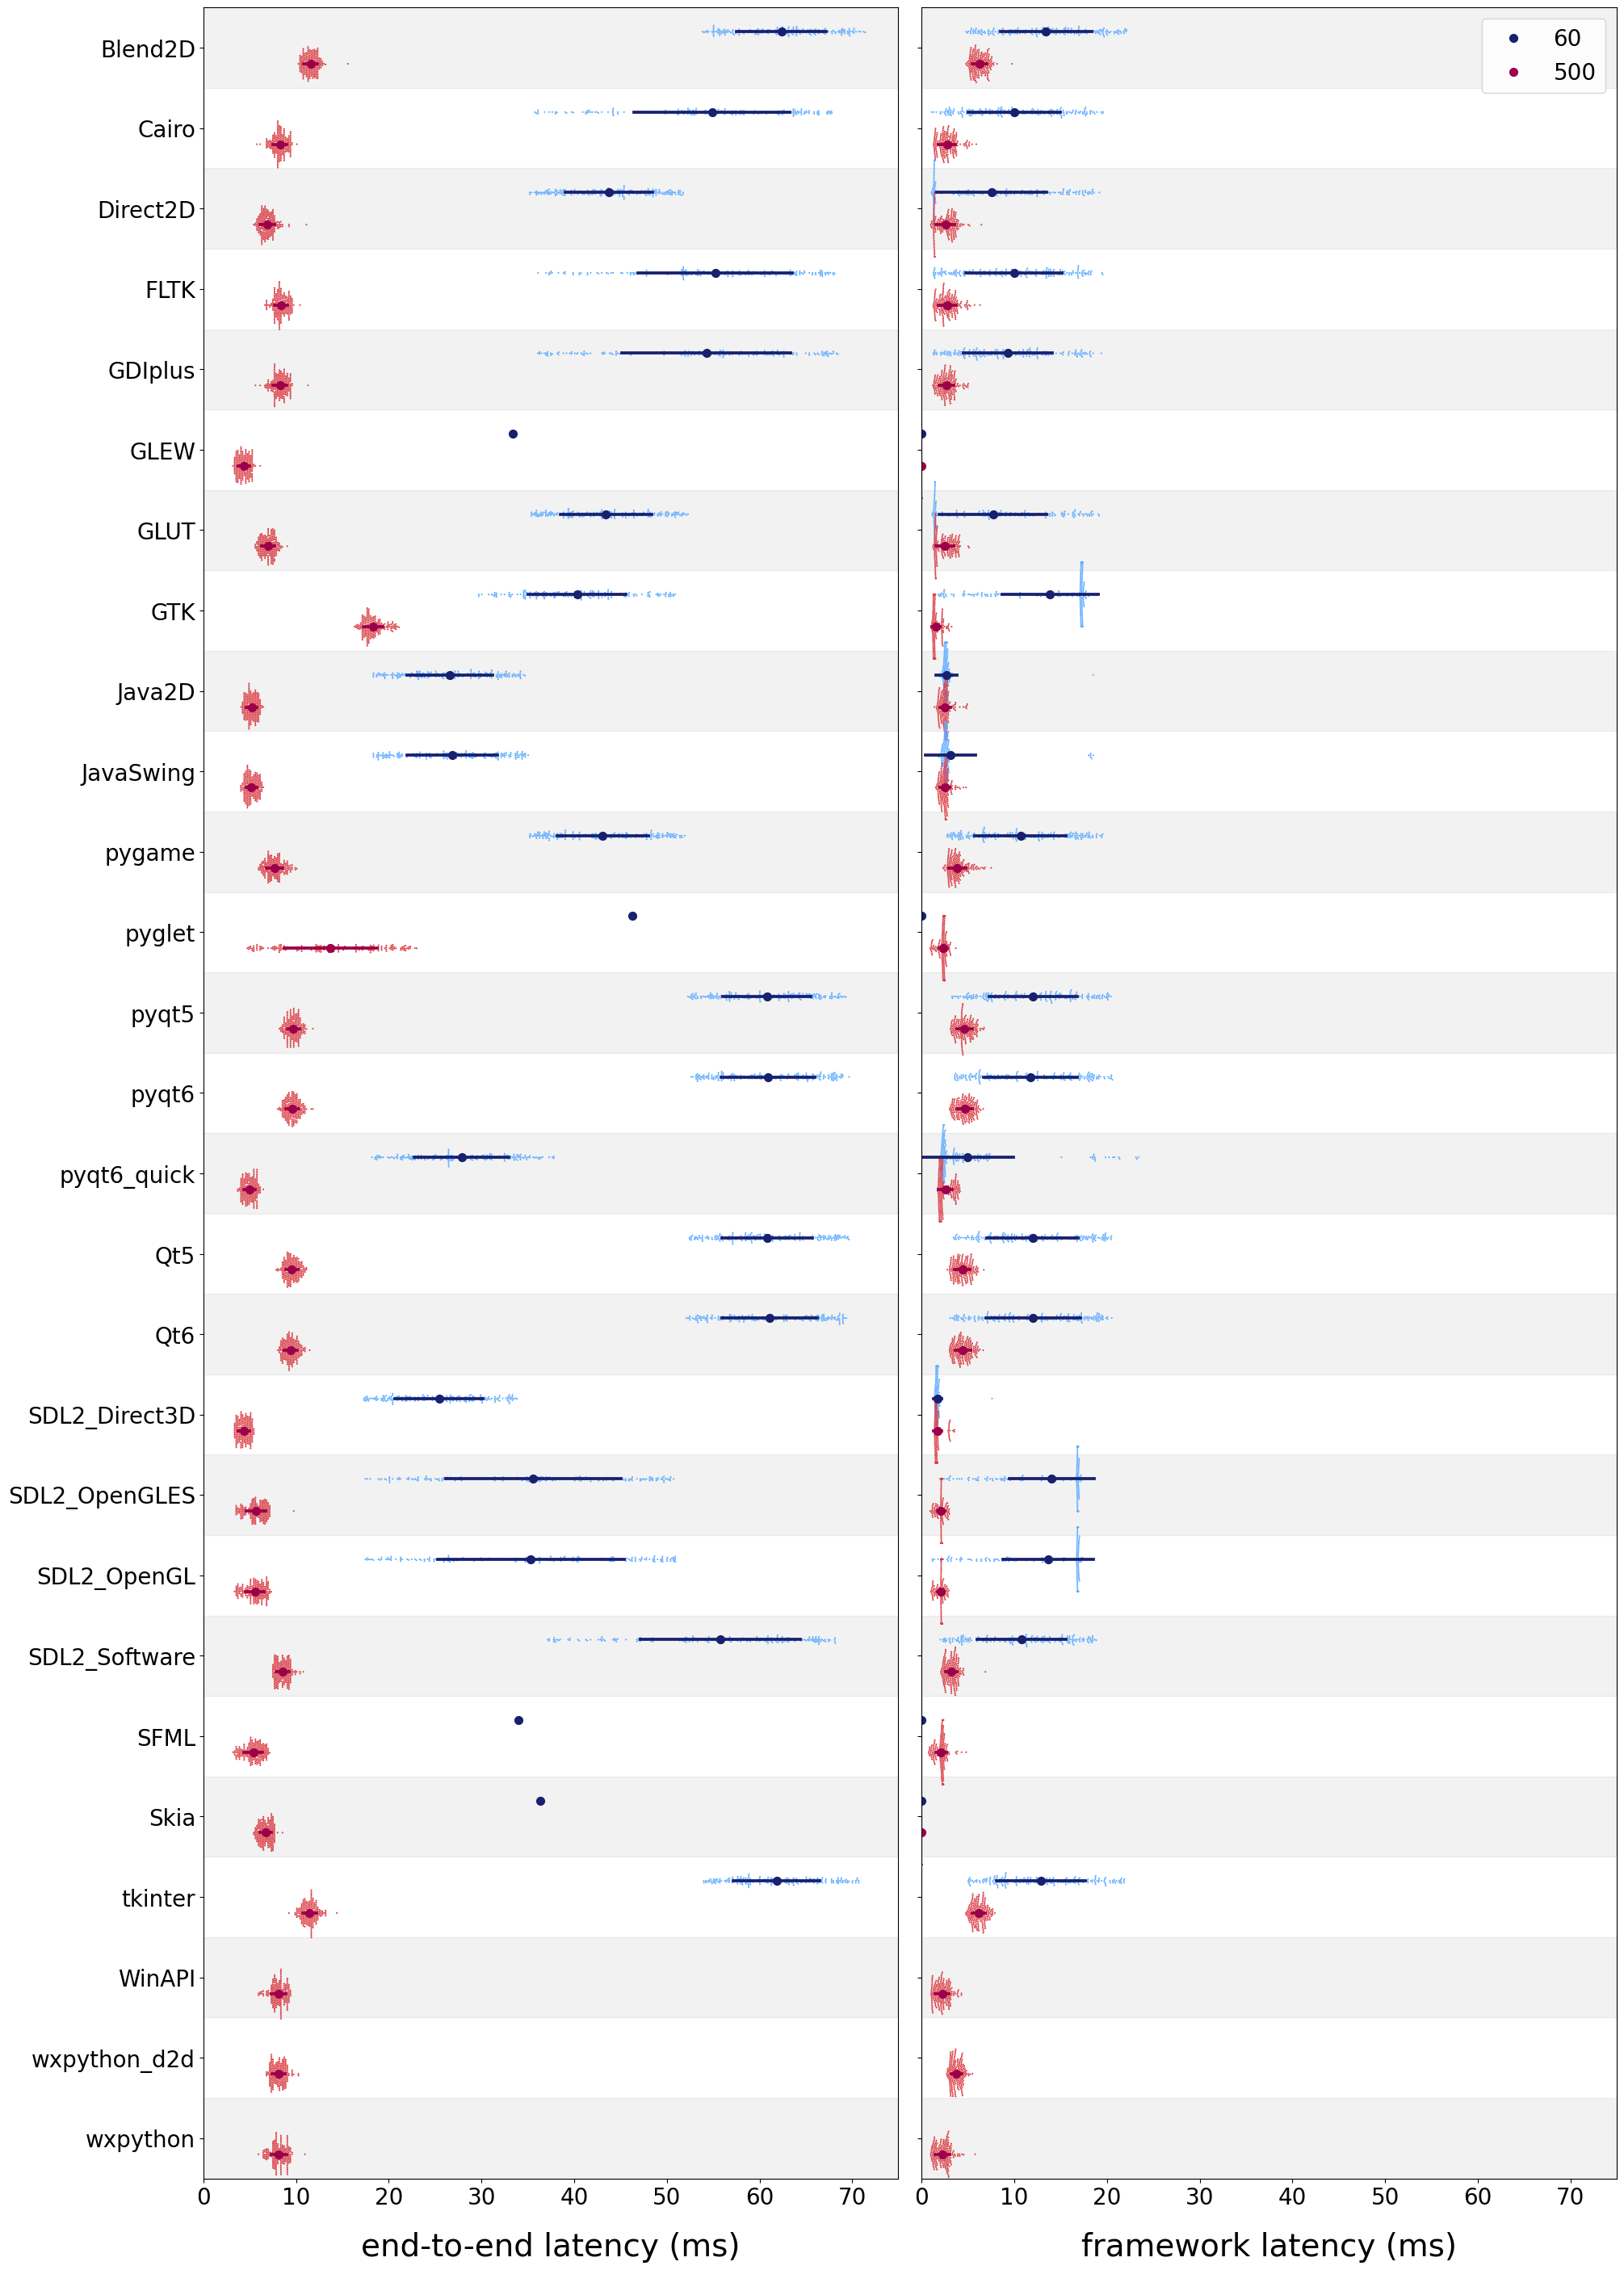

In [20]:
data_temp = data[data['fw'] < 500]  # ein ausreißer bei 8000 -> ignorieren
data_temp = data_temp[data_temp['ete_upper'] < 500]  # ein ausreißer bei 8000 -> ignorieren

fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'getpixel'], x='ete_upper', y='framework', hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'getpixel'], x='fw', y='framework', hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

plt.savefig("point_swarm_rfr_getpixel.pdf", format='pdf')

C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\

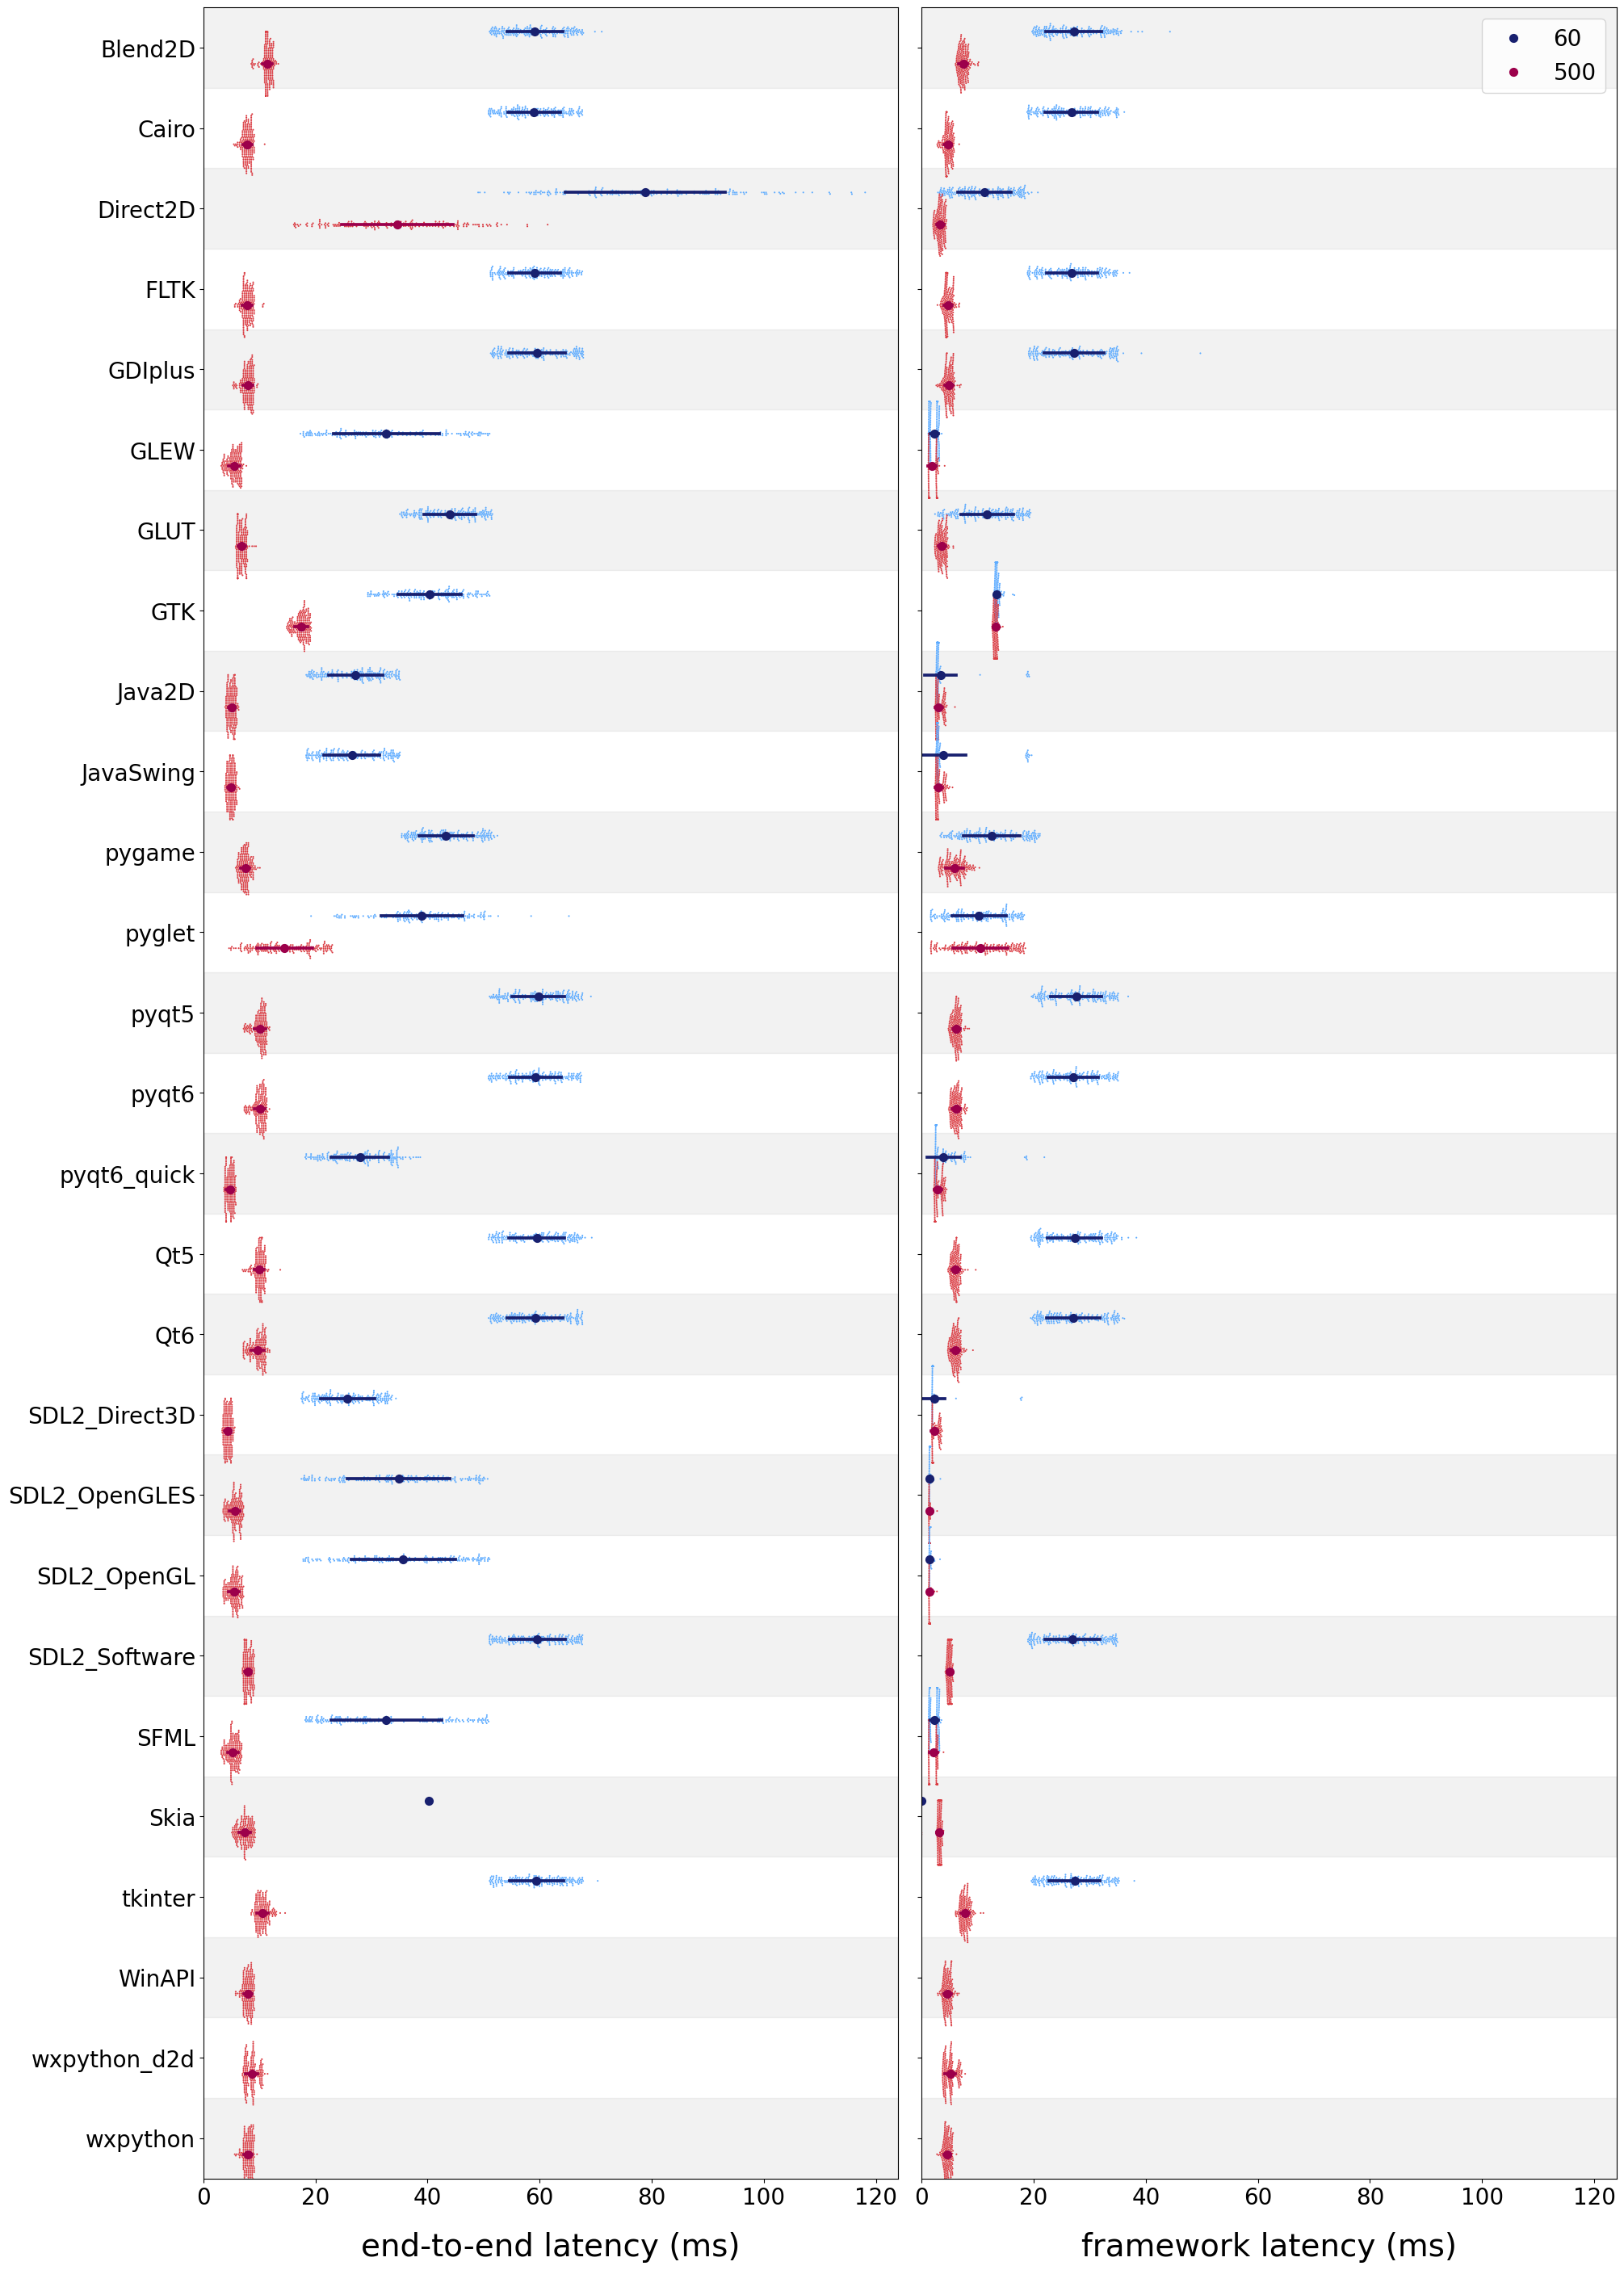

In [19]:
data_temp = data[data['fw'] < 500]  # ein ausreißer bei 8000 -> ignorieren
data_temp = data_temp[data_temp['ete_upper'] < 500]  # ein ausreißer bei 8000 -> ignorieren

fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='refresh_rate', size=1.5, dodge=True, hue_order=[60, 500], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data_temp[data_temp['program'] == 'windup'], x='ete_upper', y='framework', hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data_temp[data_temp['program'] == 'windup'], x='fw', y='framework', hue='refresh_rate', hue_order=[60, 500], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

legend = plt.legend(title='', fontsize=20, loc='upper right')
# legend.get_texts()[0].set_text('vsync off')
# legend.get_texts()[1].set_text('vsync on')

plt.savefig("point_swarm_rfr_windup.pdf", format='pdf')